# Project 12: Simulating Randomness

In [1]:
import random
import numpy as np
import pandas as pd

def run_monte_carlo(mean, sigma, num_sims, index):
    sim_dict = {}
    for i in range(num_sims):
        sim_dict[i] = {}
        for ix in index:
            sim_dict[i][ix] = random.normalvariate(mean, sigma)

    return sim_dict

mean = 0
sigma = 1
# number of simulations
num_sims = 2000
# number of periods per simulations
index = np.arange(2000)
monte_carlo_sim_dict = run_monte_carlo(mean, sigma, num_sims, index)
monte_carlo_sim_df = pd.DataFrame(monte_carlo_sim_dict)
monte_carlo_sim_df

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,1.992327,0.829645,-1.216594,-0.951098,-0.911987,-0.970070,0.047907,-0.969495,-1.169268,-0.840425,...,0.164044,0.759145,-0.153726,0.877027,0.583037,1.325310,0.483001,-0.117033,-0.451725,0.541379
1,0.050516,0.311653,-1.891719,-0.734066,-1.617584,-0.202178,0.774350,1.942928,0.393356,0.396455,...,2.463909,0.487963,0.320133,1.412007,0.782643,-0.274093,-0.750553,-2.414942,-0.052639,-2.078239
2,-0.135724,1.372069,-0.545082,-0.185503,-0.329227,-0.127976,1.241842,-0.865161,0.247280,1.626152,...,0.461958,-0.240169,0.041034,-0.167535,-0.832818,-0.995349,-0.489905,0.966082,2.209681,-0.882809
3,-0.797084,0.276255,-0.794611,0.432927,-0.811437,0.306061,0.115877,0.382004,0.957582,0.043805,...,0.437746,0.152445,0.107412,0.021223,2.078838,0.627451,-0.404132,0.322728,-1.230513,0.796491
4,0.747032,0.678680,-1.193968,-0.116198,-0.577595,-0.213485,-1.447837,0.027322,0.374793,-1.453364,...,1.816778,-0.588919,-0.700266,-0.105481,-0.258813,-0.746971,1.532733,-0.625527,-0.965227,-0.636527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.799249,-1.235621,-1.536517,-2.328066,0.203732,-0.458468,0.778043,0.897830,0.494763,1.227080,...,0.268130,0.273886,-0.378283,-0.525487,1.153576,-1.126590,-0.431918,-0.427513,-1.217558,-1.016927
1996,0.220515,1.113993,-0.040987,0.588022,0.212706,0.185379,-0.142700,-0.148673,0.026829,0.502543,...,-0.169227,-0.436212,0.460041,1.323972,-0.620918,-0.640460,0.406557,0.455014,0.775042,0.821782
1997,0.514926,0.743981,1.114201,0.249795,1.211632,0.971236,-0.358295,0.071495,-0.149892,-0.647479,...,0.294144,-0.880973,1.494432,-0.755939,-1.291687,1.290296,-0.660022,0.401922,-1.595748,-0.940893
1998,0.583626,1.379818,0.713729,-0.556088,-0.515680,-0.902885,-0.874953,-0.231476,-1.257428,0.470063,...,-1.067540,-0.385133,-0.326135,1.745977,0.214747,-0.291689,-0.236300,1.440713,-0.742920,0.909781


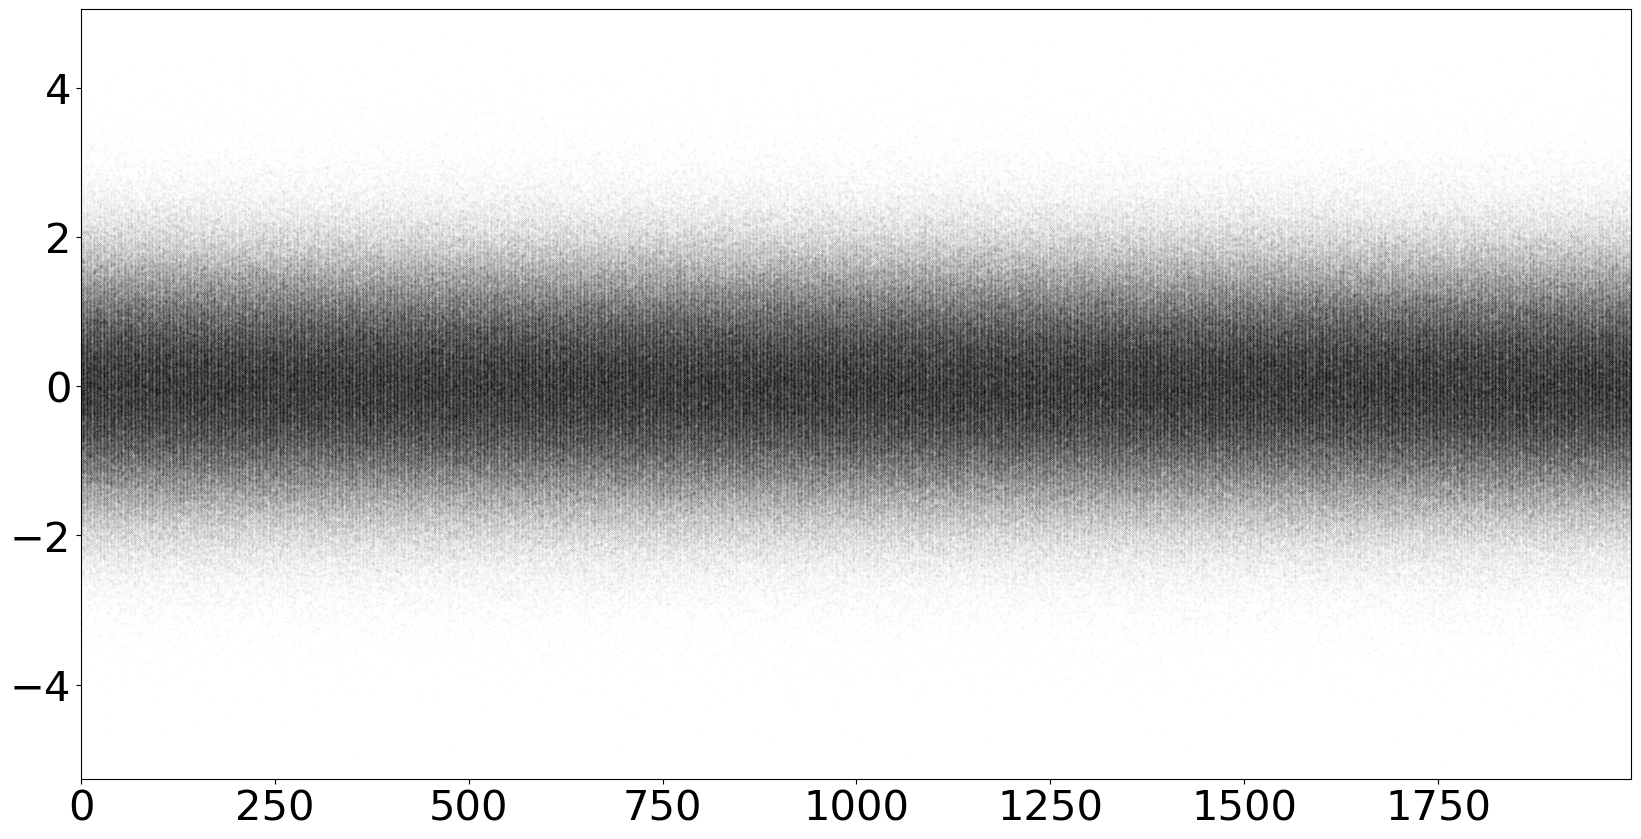

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["axes.xmargin"] = 0
plt.rcParams["axes.ymargin"] = 0
plt.rcParams["font.size"] = 30
fig, ax = plt.subplots(figsize = (20,10))
monte_carlo_sim_df.plot.line(legend = False, ls = "", marker = ".", markersize = .05, color = "k", alpha = .5, ax = ax)
plt.show()

<Axes: >

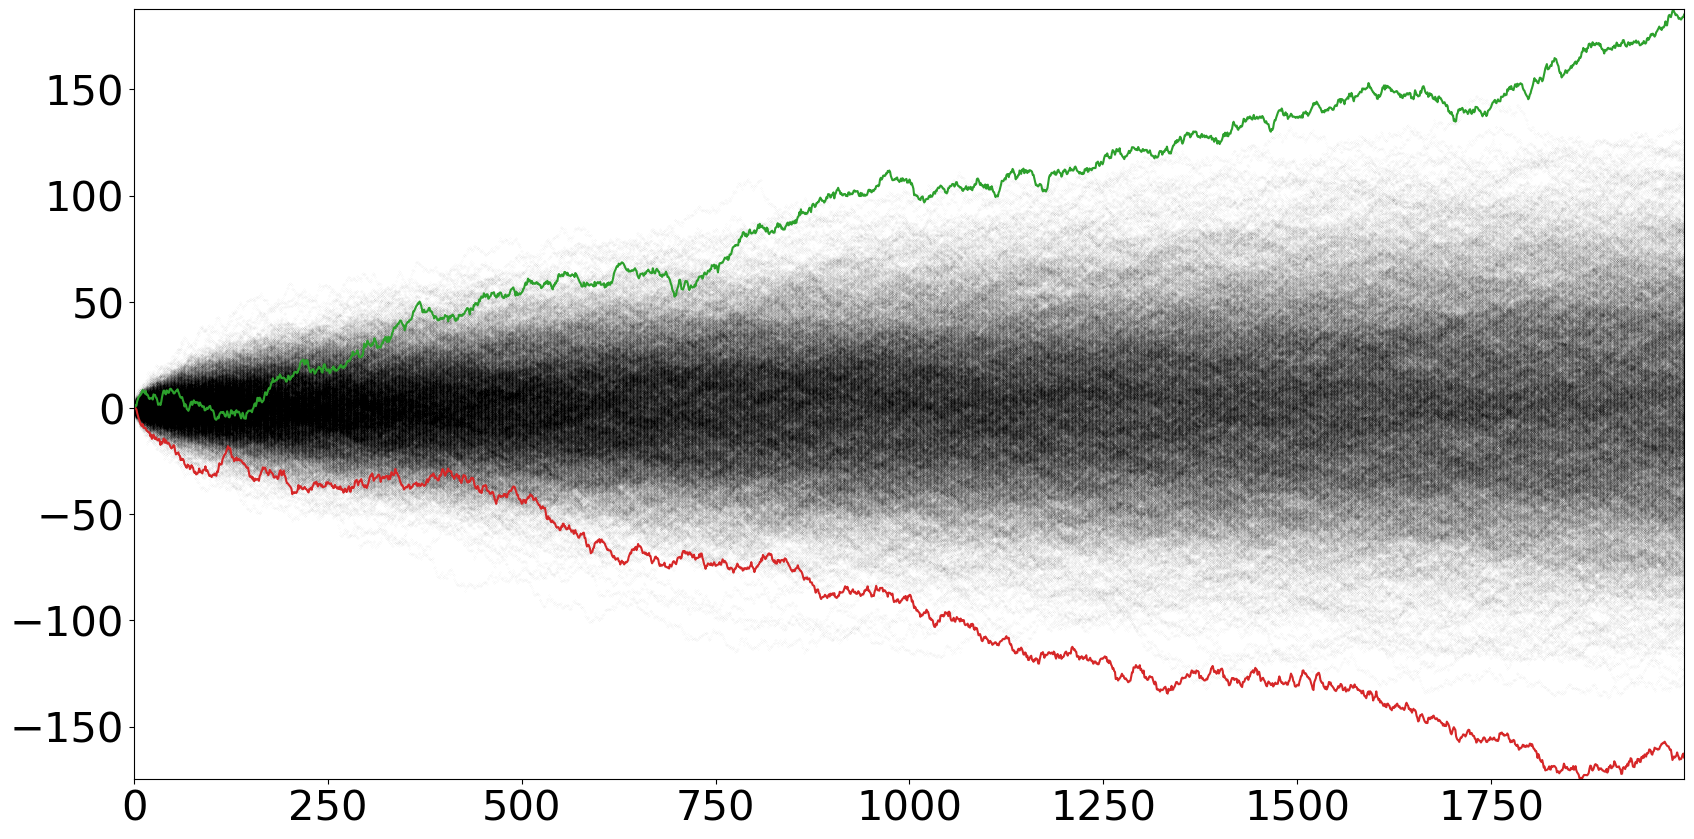

In [3]:
# find the min and max values in the very last period
plot_df = monte_carlo_sim_df.cumsum()
max = plot_df.iloc[-1].max()
min = plot_df.iloc[-1].min()
# find the column with the min and max values
## index of last row refers to the key since key values start at 0
min_key = plot_df.iloc[-1][plot_df.iloc[-1] == min].index
max_key = plot_df.iloc[-1][plot_df.iloc[-1] == max].index

fig, ax = plt.subplots(figsize = (20,10))
plot_df.plot.line(legend = False, ls = "", marker = ".", markersize = .05, color = "k", alpha = .5, ax = ax)
plot_df[min_key].plot.line(legend = False, color = "C3", ax = ax)
plot_df[max_key].plot.line(legend = False, color = "C2", ax = ax)

In [4]:
mean = .05
sigma = .5
monte_carlo_sim_dict = run_monte_carlo(mean, sigma, num_sims, index)
monte_carlo_sim_df = pd.DataFrame(monte_carlo_sim_dict).cumsum()
monte_carlo_sim_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
1995,144.505359,81.573327,80.493893,98.879094,125.041771,105.512276,46.317405,140.963652,137.167575,131.464669,...,116.285121,53.642814,35.931956,124.002409,103.326115,123.216169,97.937854,59.353691,102.704762,99.024448
1996,144.676630,81.299229,80.826375,98.336745,124.034816,106.298404,47.402911,140.667238,136.998748,131.619428,...,116.091603,54.134857,35.338882,123.872404,104.052714,123.406168,97.318752,59.882507,103.118490,99.120515
1997,145.077380,81.062460,80.621378,98.403957,124.564017,106.181498,48.432029,141.051900,136.412182,131.482249,...,115.859183,53.794105,35.557245,123.862173,103.743222,123.977334,97.576767,59.981482,103.264528,98.484482
1998,145.173821,82.146039,80.595908,98.318882,124.483756,106.558273,48.361762,140.295272,136.779921,131.174998,...,115.864639,54.313926,35.730796,123.510674,104.226122,124.078387,97.133732,60.326824,103.313219,98.093139
1999,145.300361,81.887276,80.333717,98.397306,124.851543,105.783529,48.186480,140.349570,136.682241,131.248129,...,115.717335,53.269120,35.948714,124.332458,104.338270,124.016934,96.453842,60.687558,103.405288,97.730620


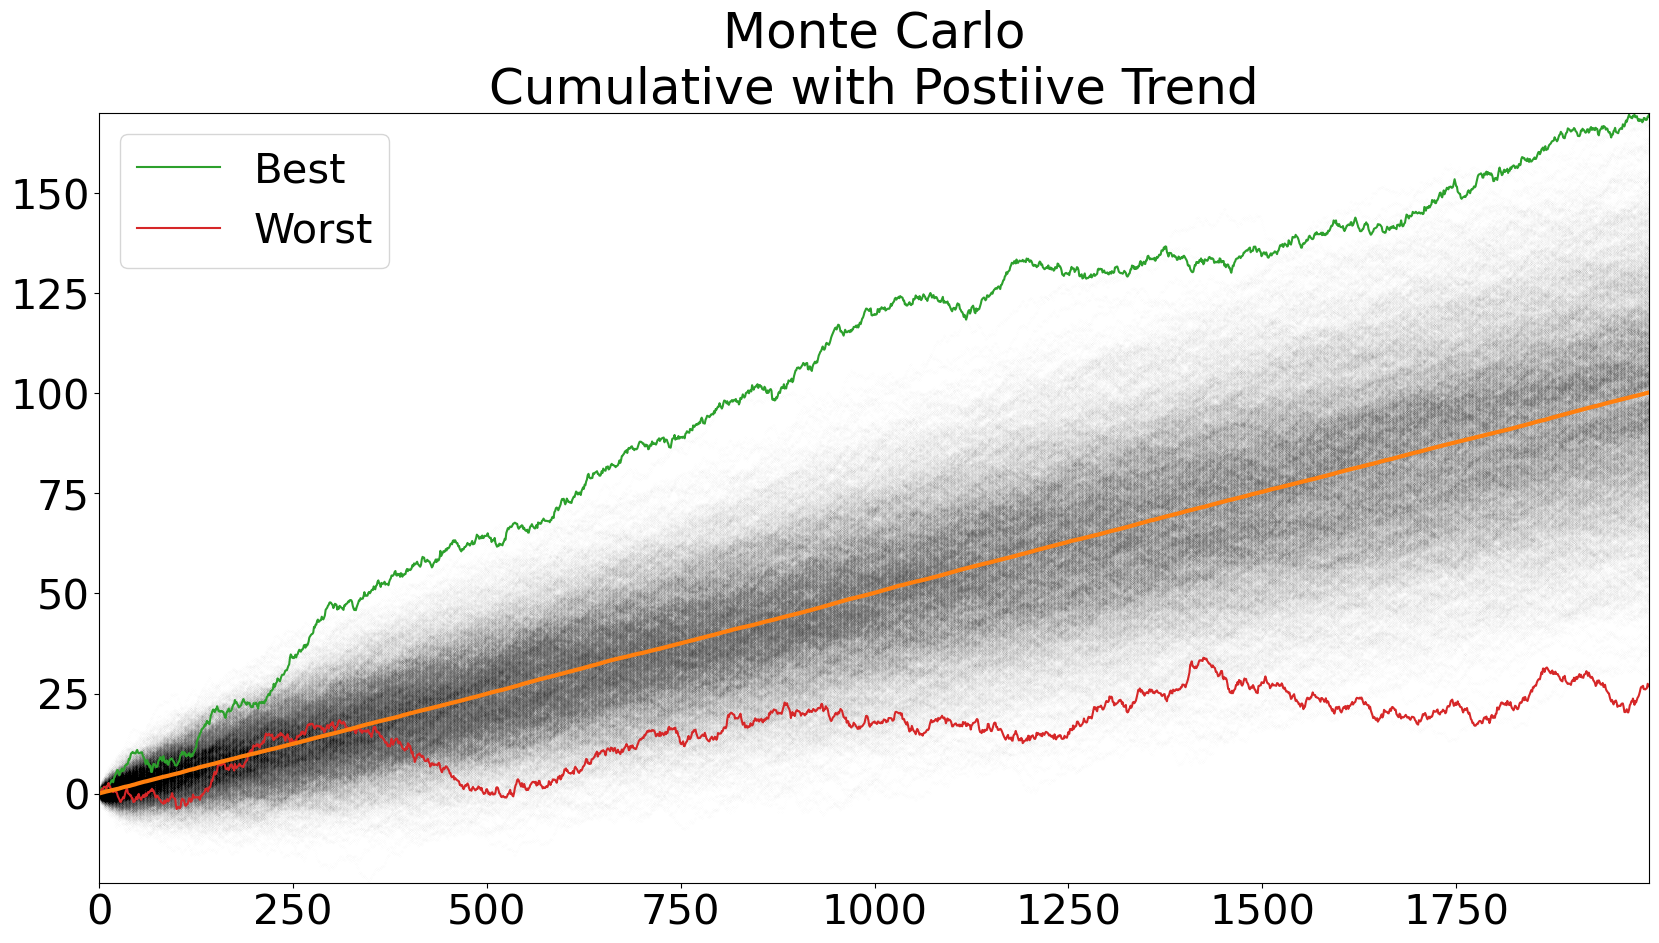

In [21]:
def plot_monte_carlo_sim(sim_data, title = None, logy = True, show_min=False, show_max=False):
    # calculate mean value by period
    sim_data["mean"] = sim_data.mean(axis=1)
    fig, ax = plt.subplots(figsize = (20,10))
    sim_data.drop("mean", inplace = False, axis = 1).plot.line(
        legend = False, ls = "", marker = ".", markersize = .2, color = "k",
        alpha = .05, logy = logy, ax = ax)
        
    if show_max:
        max = sim_data.iloc[-1].max()
        max_key = sim_data.iloc[-1][sim_data.iloc[-1] == max].index    
        sim_data.plot.line(y = max_key, legend = True,label = ["Best"], color = "C2", ax = ax)
    if show_min:
        min = sim_data.iloc[-1].min()
        min_key = sim_data.iloc[-1][sim_data.iloc[-1] == min].index    
        sim_data.plot.line(y = min_key, legend = True, label = ["Worst"], color = "C3", ax = ax)

        
    sim_data["mean"].plot.line(color = "C1", linewidth = 3,
                               logy = logy, ax = ax)
    ax.set_title(title)
    plt.show()
    plt.close()

plot_monte_carlo_sim(monte_carlo_sim_df,
                     title = "Monte Carlo\nCumulative with Postiive Trend", logy = False, show_min = True, show_max = True)

In [22]:
import pandas_datareader.data as web
import datetime
import yfinance as yf
yf.pdr_override()

In [24]:
start = datetime.datetime(2005,1,1)
end = datetime.datetime.today()
data_dict = {}
stocks = "MSFT", "AAPL", "IBM", "GOOG"
for name in stocks:
    data_dict[name] = web.get_data_yahoo(name, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [26]:
close_data_dict = {key:val["Close"] for key, val in data_dict.items()}
close_data_df = pd.DataFrame(close_data_dict)
close_data_df.tail()

,MSFT,AAPL,IBM,GOOG
Date,,,,
2024-04-23,407.570007,166.899994,182.190002,159.919998
2024-04-24,409.059998,169.020004,184.100006,161.100006
2024-04-25,399.040009,169.889999,168.910004,157.949997
2024-04-26,406.320007,169.300003,167.130005,173.690002
2024-04-29,402.250000,173.500000,167.429993,167.899994


In [27]:
close_data_pct_change = close_data_df.pct_change()
close_data_pct_change.tail()


,MSFT,AAPL,IBM,GOOG
Date,,,,
2024-04-23,0.016485,0.006392,0.001594,0.012472
2024-04-24,0.003656,0.012702,0.010484,0.007379
2024-04-25,-0.024495,0.005147,-0.082510,-0.019553
2024-04-26,0.018244,-0.003473,-0.010538,0.099652
2024-04-29,-0.010017,0.024808,0.001795,-0.033335


In [28]:
close_data_normalized = close_data_pct_change.add(1).cumprod()
close_data_normalized.fillna(1, inplace = True)
close_data_normalized.head()

,MSFT,AAPL,IBM,GOOG
Date,,,,
2005-01-03,1.000000,1.000000,1.000000,1.000000
2005-01-04,1.003740,1.010270,0.989258,0.959499
2005-01-05,1.001496,1.019118,0.987212,0.954615
2005-01-06,1.000374,1.019908,0.984143,0.930146
2005-01-07,0.997382,1.094169,0.979847,0.956292


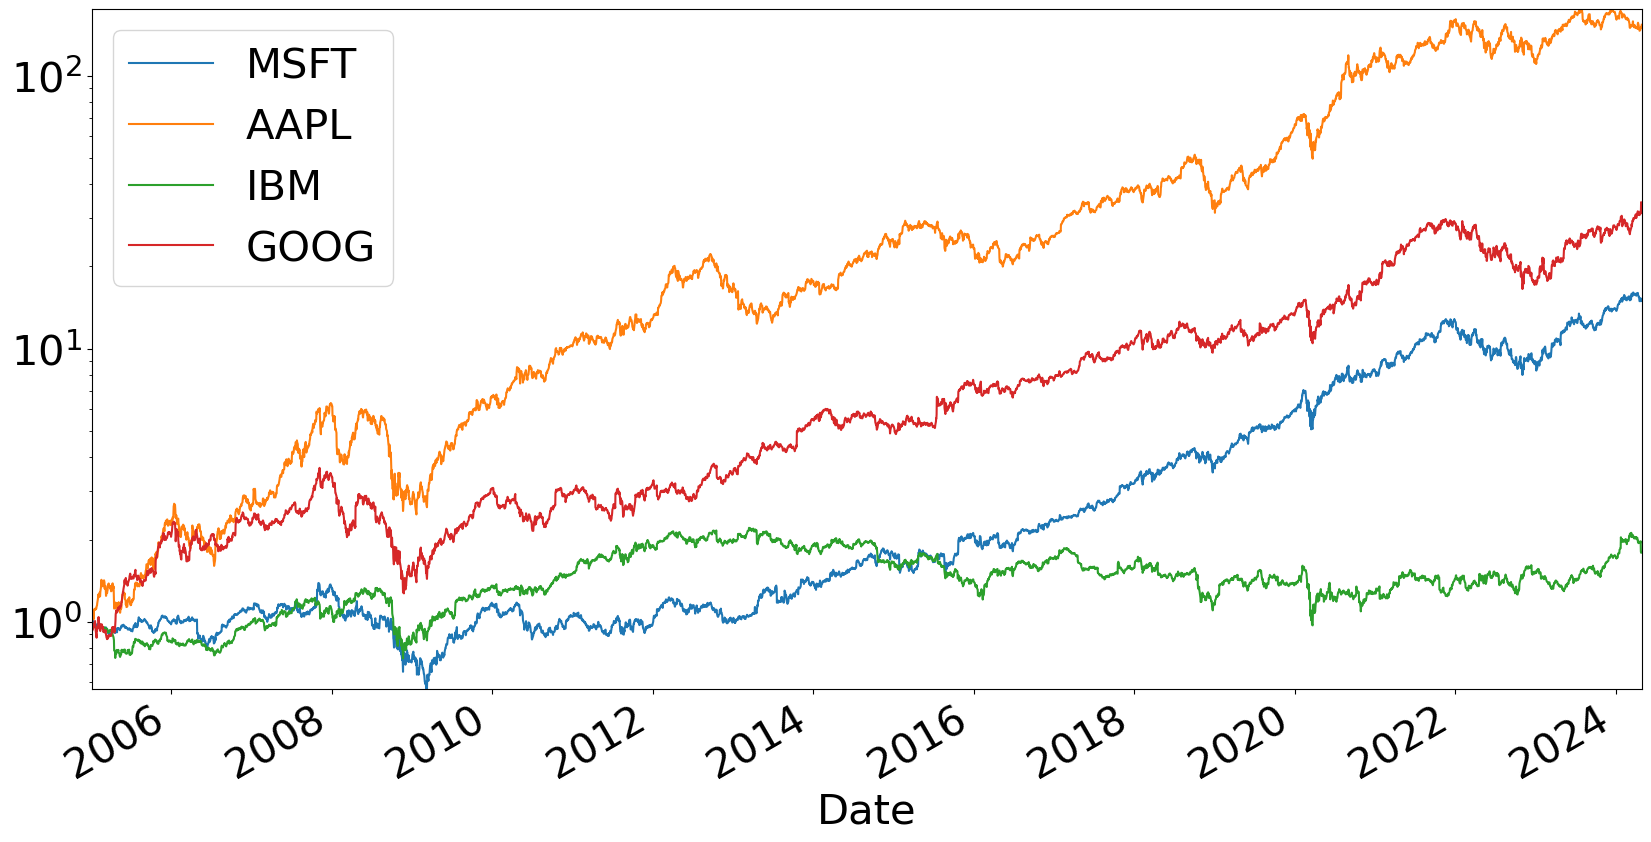

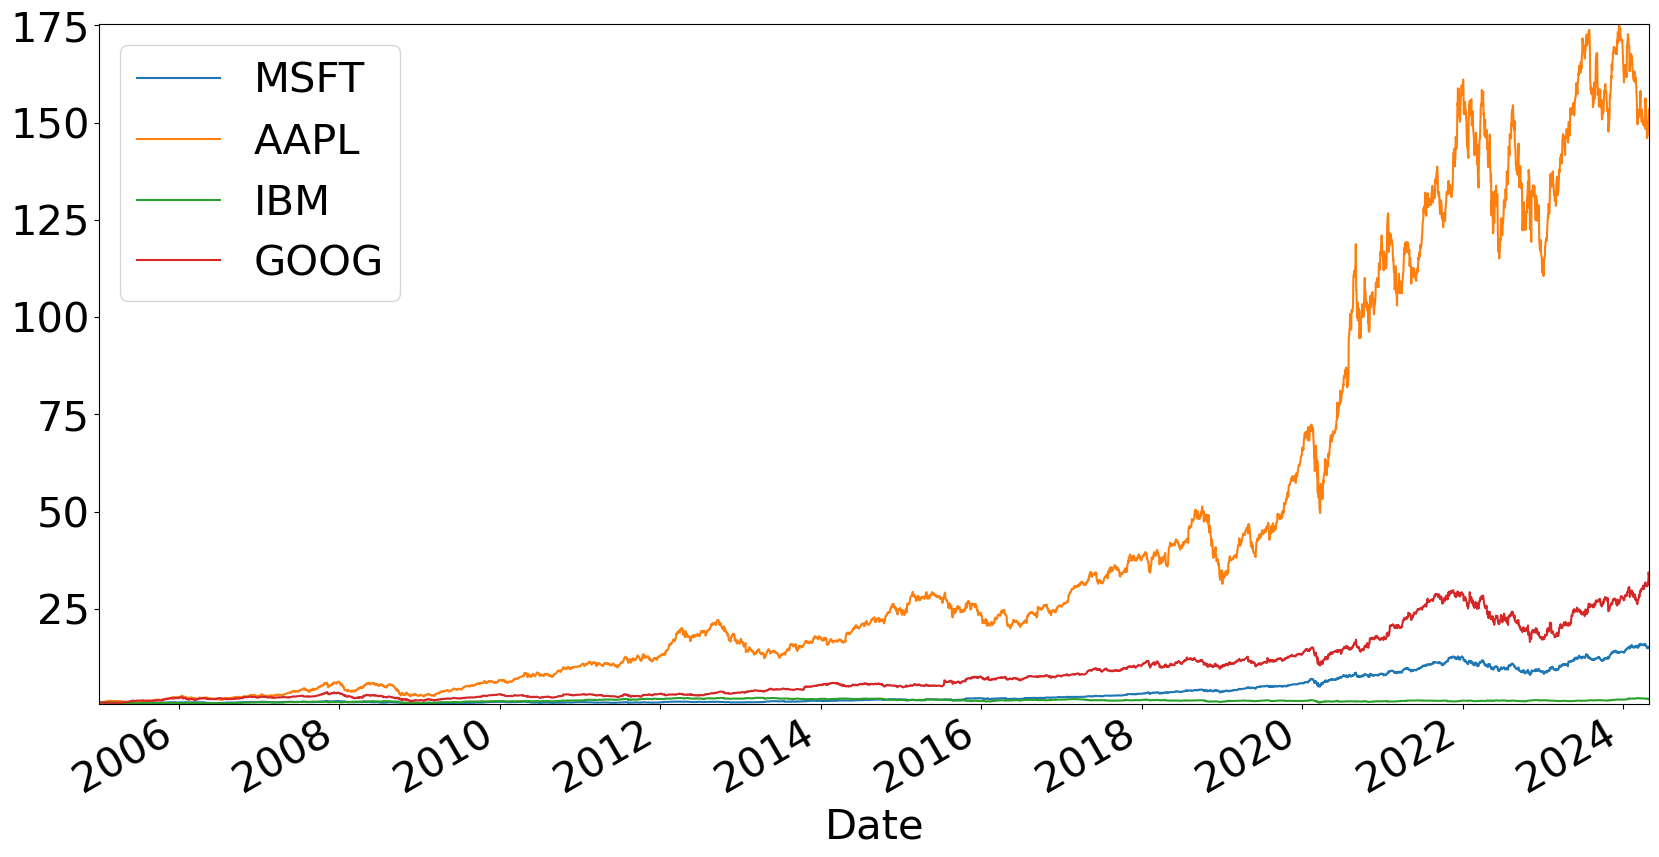

In [32]:
for log in (True, False):
    fig, ax = plt.subplots(figsize = (20,10))
    close_data_normalized.plot.line(ax = ax, logy = log)
    plt.show()
    plt.close()